# [ATM 623: Climate Modeling](../index.ipynb)
[Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany
# Lecture 5: A Brief Review of Radiation

## Contents

1. [Emission temperature and lapse rates](#section1)
2. [Solar Radiation](#section2)
3. [Terrestrial Radiation and absorption spectra](#section3)

____________
<a id='section1'></a>

## 1. Emission temperature and lapse rates
____________

Planetary energy balance is the foundation for all climate modeling. So far we have expressed this through a globally averaged budget

$$C \frac{d T_s}{dt} = (1-\alpha) Q - OLR$$

and we have written the OLR in terms of an emission temperature $T_e$ where by definition

$$ OLR = \sigma T_e^4 $$

Using values from the observed planetary energy budget, we found that $T_e = 255$ K

The emission temperature of the planet is thus about 33 K colder than the mean surface temperature (288 K).

### Where in the atmosphere do we find $T = T_e = 255$ K?

Let's get plot air temperature from NCEP reanalysis data.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

ncep_url = "http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/"
ncep_air = nc.Dataset( ncep_url + "pressure/air.mon.1981-2010.ltm.nc" )
level = ncep_air.variables['level'][:]
lat = ncep_air.variables['lat'][:]
zstar = np.log(level/1000)

In [2]:
Tzon = np.mean(ncep_air.variables['air'][:],axis=(0,3))
Tglobal = np.average( Tzon , weights=np.cos(np.deg2rad(lat)), axis=1)

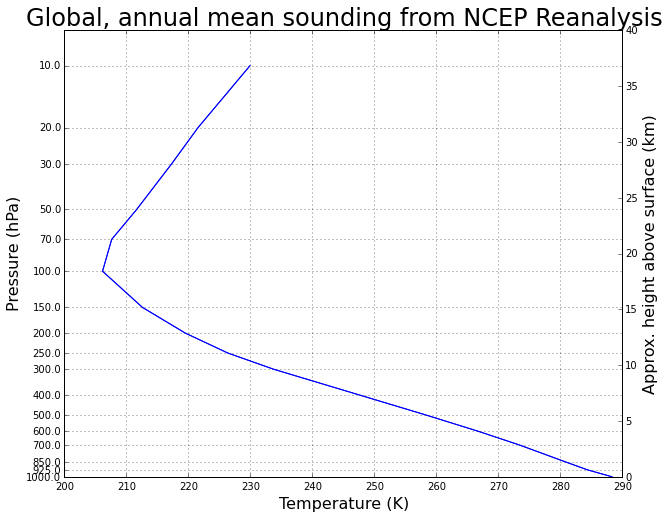

In [3]:
fig = plt.figure( figsize=(10,8) )
ax = fig.add_subplot(111)
ax.plot( Tglobal + 273.15, zstar )
ax.invert_yaxis()
ax.set_xlabel('Temperature (K)', fontsize=16)
ax.set_ylabel('Pressure (hPa)', fontsize=16 )
ax.set_yticks( zstar )
ax.set_yticklabels( level )
ax.set_title('Global, annual mean sounding from NCEP Reanalysis', fontsize = 24)
ax2 = ax.twinx()
ax2.plot( Tglobal + 273.15, -8*zstar );
ax2.set_ylabel('Approx. height above surface (km)', fontsize=16 );
ax.grid()

Note that surface temperature in global mean is indeed about 288 K as we keep saying.

So where do we find temperature $T_e=255$ K?

Actually in mid-troposphere, near 500 hPa or about 5 km height.

We can infer that much of the outgoing longwave radiation actually originates far above the surface.

Recall that our observed global energy budget diagram shows 217 out of 239 W m$^{-2}$ total OLR emitted by the atmosphere and clouds, only 22 W m$^{-2}$ directly from the surface.

This is due to the **greenhouse effect**. So far we have dealt with the greenhouse in a very artificial way in our energy balance model by simply assuming a linear relationship 

$$ T_e = \beta T_s$$

which is equivalent to assuming the OLR is reduced by a constant factor from the value it would have if the Earth emitted as a blackbody at the surface temperature.

Now it's time to start thinking a bit more about how the radiative transfer process actually occurs in the atmosphere, and how to model it.

____________
<a id='section2'></a>

## 2. Solar Radiation
____________

Look at spectrum of solar radiation.


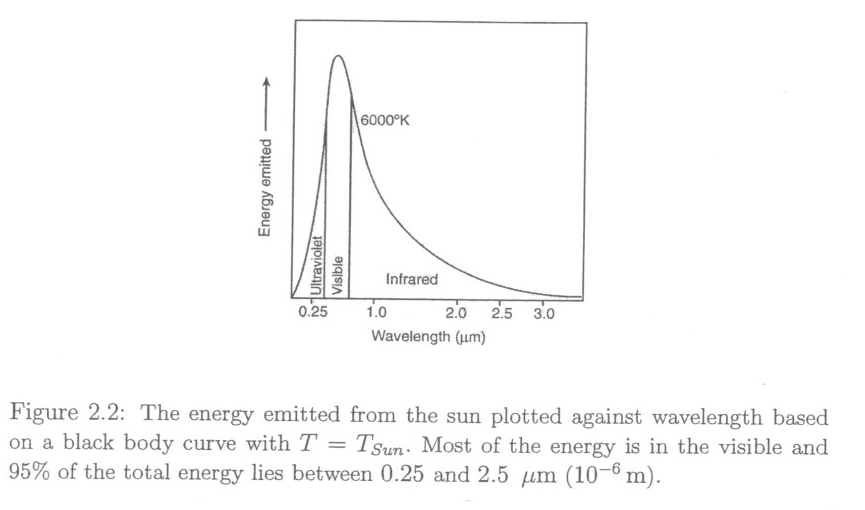

In [4]:
from IPython.display import Image
Image('../images/MarshallPlumbFig2.2.png')

*Figure reproduced from Marshall and Plumb (2008): Atmosphere, Ocean, and Climate Dynamics*

- Spectrum peaks in the visible range
- most energy at these wavelength.
- No coincidence that our eyes are sensitive to this range of wavelengths!
- Longer wavelengths called “infrared”, shorter wavelengths called “ultraviolet”.

The shape of the spectrum is a fundamental characteristic of radiative emissions
(think about the color of burning coals in a fire – cooler = red, hotter = white)

Theory and experiments tell us that both the total flux of emitted radiation, and the wavelength of maximum emission, depend only on the temperature of the source!

The theoretical spectrum was worked out by Max Planck and is therefore known as the “Planck” spectrum (or simply blackbody spectrum).

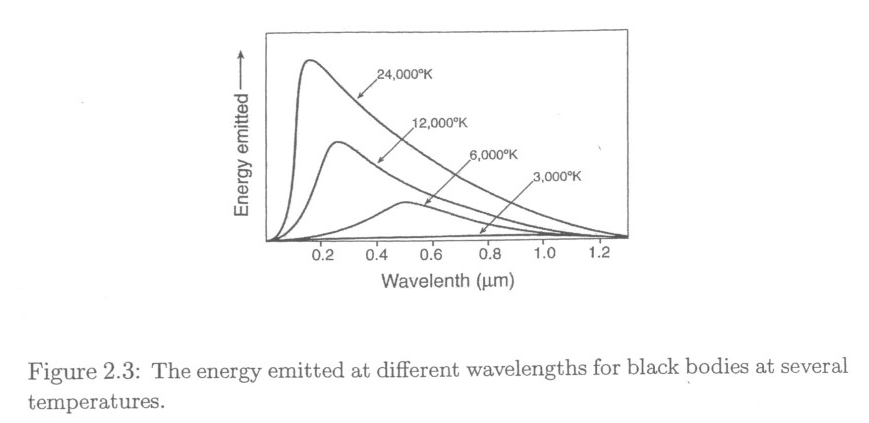

In [5]:
Image('../images/MarshallPlumbFig2.3.png')

*Figure reproduced from Marshall and Plumb (2008): Atmosphere, Ocean, and Climate Dynamics*

Going from cool to warm:

- total emission increases
- maximum emission occurs at shorter wavelengths.

The **integral of these curves over all wavelengths** gives us our familiar $\sigma T^4$

Also show that we can trace a nice curve through the peaks… 

Mathematically it turns out that 

$$ λ_{max} T = \text{constant} $$

(known as Wien’s displacement law).

By fitting the observed solar emission to a blackbody curve, we can deduce that the emission temperature of the sun is about 6000 K.

Knowing this, and knowing that the solar spectrum peaks at 0.6 micrometers, we can calculate the wavelength of maximum terrestrial radiation as

$$ λ_{max}^{Earth} = 0.6 ~ \mu m \frac{6000}{255} = 14 ~ \mu m $$

This is in the far-infrared part of the spectrum.

____________
<a id='section3'></a>

## 3. Terrestrial Radiation and absorption spectra
____________

Now let's look at normalized blackbody curves for Sun and Earth:

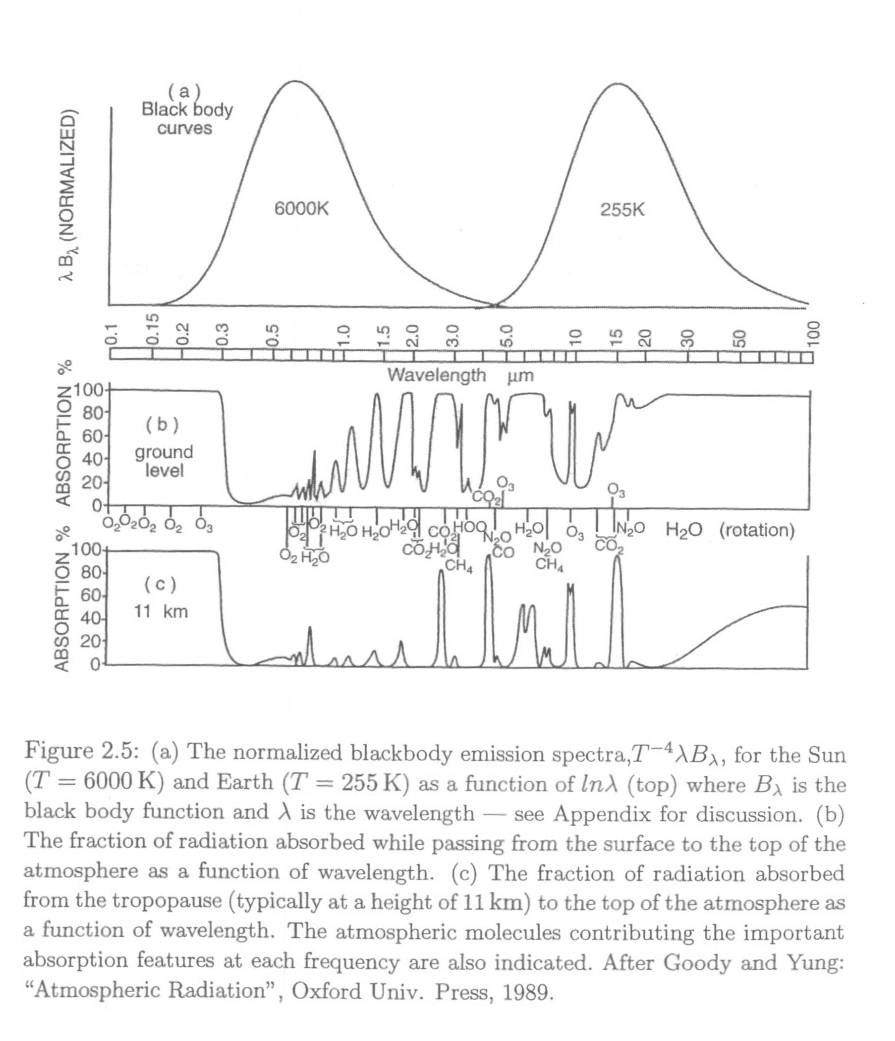

In [6]:
Image('../images/MarshallPlumbFig2.5.png')

*Figure reproduced from Marshall and Plumb (2008): Atmosphere, Ocean, and Climate Dynamics*

There is essentially no overlap between the two spectra.

**This is the fundamental reason we can discuss the solar “shortwave” and terrestrial “longwave” radiation as two distinct phenomena.**

In reality all radiation exists on a continuum of different wavelengths. But in climate science we can get a long way by thinking in terms of a very simple “two-stream” approximation (short and longwave). We’ve already been doing this throughout the course so far!

Now look at the atmospheric absorption spectra.
(fraction of radiation at each wavelength that is absorbed on a single vertical path through the atmosphere)

- Atmosphere is almost completely transparent in the visible range, right at the peak of the solar spectrum
- Atmosphere is very opaque in the UV
- Opacity across the IR spectrum is highly variable!
- Look at the gases associated with various absorption features:
- Main players include H$_2$O, CO$_2$, N$_2$O, O$_2$.
- Compare to major constituents of atmosphere, in decreasing order: 
    - 78% N$_2$
    - 21% O$_2$
    - 1% Ar
    - H$_2$O (variable) 
- The dominant constituent gases N$_2$ and O$_2$ are nearly completely transparent across the entire spectrum (there are O$_2$ absorption features in far UV, but little energy at these wavelengths).
- The greenhouse effect mostly involves trace constituents: 
    - O3 = 500 ppb
    - N2O = 310 ppb
    - CO2 = 400 ppm (but rapidly increasing!)
    - CH4 = 1.7 ppm
- Note that most of these are tri-atomic molecules! There are fundamental reasons for this: these molecules have modes of rotational and vibration that are easily excited at IR wavelengths. See courses in radiative transfer!


<div class="alert alert-success">
[Back to ATM 623 notebook home](../index.ipynb)
</div>

____________
## Credits

The author of this notebook is [Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany.

It was developed in support of [ATM 623: Climate Modeling](http://www.atmos.albany.edu/facstaff/brose/classes/ATM623_Spring2015/), a graduate-level course in the [Department of Atmospheric and Envionmental Sciences](http://www.albany.edu/atmos/index.php), offered in Spring 2015.
____________